In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


%matplotlib inline

In [2]:
path = './Accuracies/'
models = ['DNN_0', 'DNN_1', 'DNN_3', 'RF','RF_S']


model_names = {0: 'DNN with 0 hidden layers',
              1: 'DNN with 1 hidden layers',
              2: 'DNN with 3 hidden layers',
              3: 'Random Forest',
              4: 'Larger Random Forest'}

n_models = len(models)

gen_data_portions = [0.0, 0.25, 0.5, 0.75, 1.0]
percentages = ['0', '25', '50', '75', '100']
cv_len = 105    # number of cross-validation folds

In [3]:
results = np.zeros(shape=(n_models, 2, 5, cv_len))


for i, model in enumerate(models):
    for t, gen_data_utilization in enumerate(gen_data_portions):
        array = np.load(path + model + '_stone_only_cv_accs_' + str(gen_data_utilization) + '.npy')
        
        array_A = np.load(path + model + '_A_stone_only_cv_accs_' + str(gen_data_utilization) + '.npy')
        
        results[i, 0, t, :] = array
        results[i, 1, t, :] = array_A
    
np.save(path + 'overall_results.npy', results)

In [4]:
results = np.load(path + 'overall_results.npy')

## Generated Data Usage

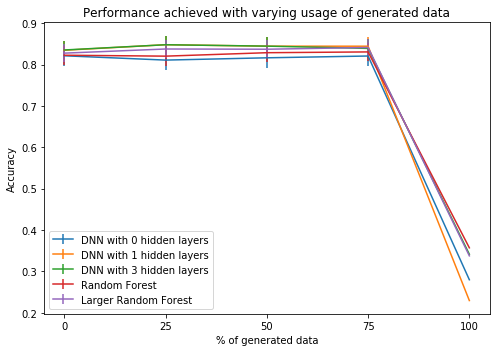

In [5]:
standard_errors = (np.std(results, axis=3)/ np.sqrt(cv_len))[:, 1, :]
mean_accs = np.mean(results, axis=3)[:, 1, :]

plt.figure(figsize=(7,5))

plt.errorbar(x=percentages, y=mean_accs[0], yerr=standard_errors[0], label=model_names[0])
plt.errorbar(x=percentages, y=mean_accs[1], yerr=standard_errors[1], label=model_names[1])
plt.errorbar(x=percentages, y=mean_accs[2], yerr=standard_errors[2], label=model_names[2])
plt.errorbar(x=percentages, y=mean_accs[3], yerr=standard_errors[3], label=model_names[3])
plt.errorbar(x=percentages, y=mean_accs[4], yerr=standard_errors[4], label=model_names[4])


plt.ylabel('Accuracy')
plt.xlabel('% of generated data')
plt.title('Performance achieved with varying usage of generated data')
plt.legend()
plt.tight_layout()

image_filename = 'gen_data_usage_all_performance.png'
plt.savefig(image_filename, dpi=500)

plt.show()

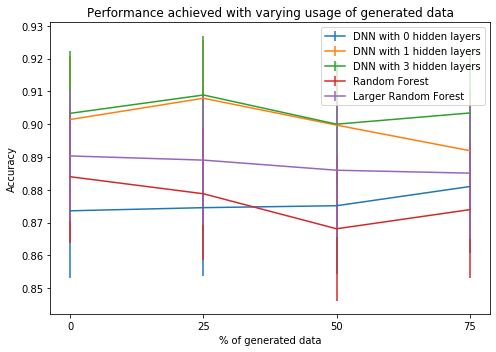

In [6]:
standard_errors = (np.std(results, axis=3)/ np.sqrt(cv_len))[:, 0,:-1]
mean_accs = np.mean(results, axis=3)[:, 0, :-1]

plt.figure(figsize=(7,5))

plt.errorbar(x=percentages[:-1], y=mean_accs[0], yerr=standard_errors[0], label=model_names[0])
plt.errorbar(x=percentages[:-1], y=mean_accs[1], yerr=standard_errors[1], label=model_names[1])
plt.errorbar(x=percentages[:-1], y=mean_accs[2], yerr=standard_errors[2], label=model_names[2])
plt.errorbar(x=percentages[:-1], y=mean_accs[3], yerr=standard_errors[3], label=model_names[3])
plt.errorbar(x=percentages[:-1], y=mean_accs[4], yerr=standard_errors[4], label=model_names[4])


plt.ylabel('Accuracy')
plt.xlabel('% of generated data')
plt.title('Performance achieved with varying usage of generated data')
plt.legend()
plt.tight_layout()

image_filename = 'gen_data_usage_not_100_performance.png'
plt.savefig(image_filename, dpi=500)

plt.show()

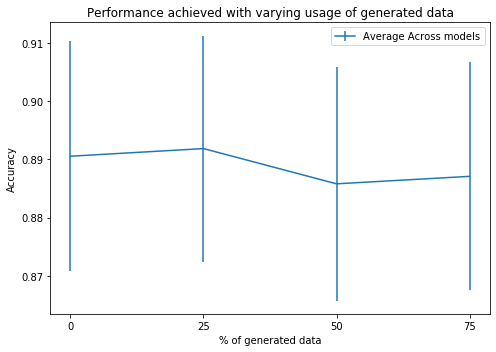

In [7]:
standard_errors = (np.std(results, axis=(0,3))/ np.sqrt(cv_len))[0,:-1]
mean_accs = np.mean(results, axis=(0,3))[0, :-1]

plt.figure(figsize=(7,5))

plt.errorbar(x=percentages[:-1], y=mean_accs, yerr=standard_errors, label='Average Across models')


plt.ylabel('Accuracy')
plt.xlabel('% of generated data')
plt.title('Performance achieved with varying usage of generated data')
plt.legend()
plt.tight_layout()

image_filename = 'gen_data_usage_averaged_performance.png'
plt.savefig(image_filename, dpi=500)

plt.show()

## Autoencoder Impact

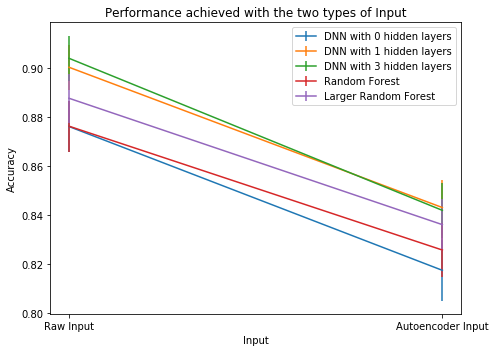

In [8]:
standard_errors = (np.std(results[:, :, :-1, :], axis=(2, 3))/ np.sqrt(cv_len*4))
mean_accs = np.mean(results[:, :, :-1, :], axis=(2, 3))

plt.figure(figsize=(7,5))

labels = ['Raw Input', 'Autoencoder Input']

plt.errorbar(x=labels, y=mean_accs[0], yerr=standard_errors[0], label=model_names[0])
plt.errorbar(x=labels, y=mean_accs[1], yerr=standard_errors[1], label=model_names[1])
plt.errorbar(x=labels, y=mean_accs[2], yerr=standard_errors[2], label=model_names[2])
plt.errorbar(x=labels, y=mean_accs[3], yerr=standard_errors[3], label=model_names[3])
plt.errorbar(x=labels, y=mean_accs[4], yerr=standard_errors[4], label=model_names[4])

plt.ylabel('Accuracy')
plt.xlabel('Input')
plt.title('Performance achieved with the two types of Input')
plt.legend()
plt.tight_layout()

image_filename = 'autoencoder_performance.png'
plt.savefig(image_filename, dpi=500)

plt.show()

In [9]:
print('p-values for Autoencoder input performing as well as raw input\n')
for i in range(n_models):
    _, p_value = ttest_ind(results[i, 0, :, :].flatten(), results[i, 1, :, :].flatten())
    print(model_names[i] + ':', p_value)

_, p_value = ttest_ind(results[:, 0, :, :].flatten(), results[:, 1, :, :].flatten())
print('\n\nAveraged p-value:', p_value)

p-values for Autoencoder input performing as well as raw input

DNN with 0 hidden layers: 0.1191813729327985
DNN with 1 hidden layers: 0.0003958477691663767
DNN with 3 hidden layers: 0.01964480862251098
Random Forest: 0.3743665554307689
Larger Random Forest: 0.25707407192520737


Averaged p-value: 2.442200055639296e-05


## Element Classifying

In [10]:
elem_results = np.zeros(shape=(2, 2, 5, cv_len))
model = models[2]

for t, gen_data_utilization in enumerate(gen_data_portions):
    array = np.load(path + model + '_elem_cv_accs_' + str(gen_data_utilization) + '.npy')
    array_A = np.load(path + model + '_A_elem_cv_accs_' + str(gen_data_utilization) + '.npy')
    array_only = np.load(path + model + '_elem_stone_only_cv_accs_' + str(gen_data_utilization) + '.npy')
    array_A_only = np.load(path + model + '_A_elem_stone_only_cv_accs_' + str(gen_data_utilization) + '.npy')

    elem_results[0, 0, t, :] = array
    elem_results[0, 1, t, :] = array_A
    elem_results[1, 0, t, :] = array_only
    elem_results[1, 1, t, :] = array_A_only

np.save(path + 'elem_results.npy', results)

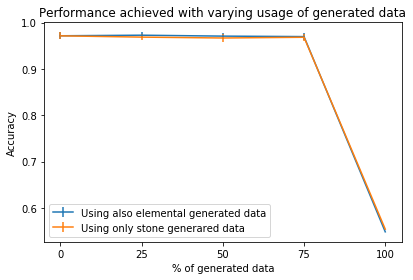

In [11]:
standard_errors = (np.std(elem_results, axis=3)/ np.sqrt(cv_len))[:, 0, :]
mean_accs = np.mean(elem_results, axis=3)[:, 0, :]

plt.figure(figsize=(6,4))

label_stone = 'Using only stone generared data'
label_elem = 'Using also elemental generated data'

plt.errorbar(x=percentages, y=mean_accs[0], yerr=standard_errors[0], label=label_elem)
plt.errorbar(x=percentages, y=mean_accs[1], yerr=standard_errors[1], label=label_stone)


plt.ylabel('Accuracy')
plt.xlabel('% of generated data')
plt.title('Performance achieved with varying usage of generated data')
plt.legend()
plt.tight_layout()

image_filename = 'elemental_gen_data_usage_all_performance.png'
plt.savefig(image_filename, dpi=500)

plt.show()

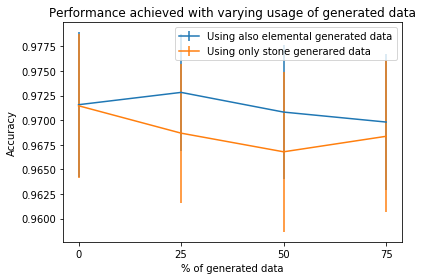

In [12]:
standard_errors = (np.std(elem_results, axis=3)/ np.sqrt(cv_len))[:, 0, :-1]
mean_accs = np.mean(elem_results, axis=3)[:, 0, :-1]

plt.figure(figsize=(6,4))

label_stone = 'Using only stone generared data'
label_elem = 'Using also elemental generated data'

plt.errorbar(x=percentages[:-1], y=mean_accs[0], yerr=standard_errors[0], label=label_elem)
plt.errorbar(x=percentages[:-1], y=mean_accs[1], yerr=standard_errors[1], label=label_stone)

plt.ylabel('Accuracy')
plt.xlabel('% of generated data')
plt.title('Performance achieved with varying usage of generated data')
plt.legend()
plt.tight_layout()

image_filename = 'elemental_gen_data_usage_not_100_performance.png'
plt.savefig(image_filename, dpi=500)

plt.show()